Dataset:
Churn Modeling Dataset

Description:
Contains demographic, financial, and behavioral information of bank customers to predict whether a customer will exit (churn) from the bank.
Columns:
Includes customer demographics (age, gender, geography), account information (balance, credit score, tenure), product usage, activity level, and churn status.
Purpose:
Used to analyze factors influencing customer churn and to build predictive models that identify customers at high risk of leaving the bank.
Applications:
Customer retention modeling, churn prediction systems, risk analysis, marketing segmentation, and improving customer lifetime value strategies.
Analysis Tasks:
Exploratory Data Analysis (EDA), feature selection, data preprocessing (encoding, scaling), machine learning modeling (classification), model evaluation, and deployment for churn prediction.
Relevance:
A widely used real-world dataset for developing churn prediction solutions in the banking sector, helping organizations minimize customer loss and improve engagement.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Interpretation

Churn appears to be higher among older customers, those with higher balances, customers from Germany, and those who are inactive or use fewer products—indicating weak engagement with the bank. In contrast, longer tenure, active membership, and multiple product subscriptions are strongly associated with lower churn, suggesting deeper customer loyalty.
Financial variables like credit score and estimated salary show minimal direct impact and become meaningful only when combined with behavioral factors. These relationships will be examined further through visual exploration before moving into modeling and identifying the most influential features.

Churn Distribution (pie chart)

What this graph shows:
A churn distribution bar chart displays the total number (or percentage) of customers who churned vs those who remained. It highlights how imbalanced the churn variable is and helps determine whether special modeling techniques (e.g., resampling) are needed.
How to interpret it:
If the chart shows many more “No Churn” customers than “Churn” customers, the dataset is imbalanced, meaning churners are the minority group. This indicates that predicting churn will be more challenging and requires careful handling.

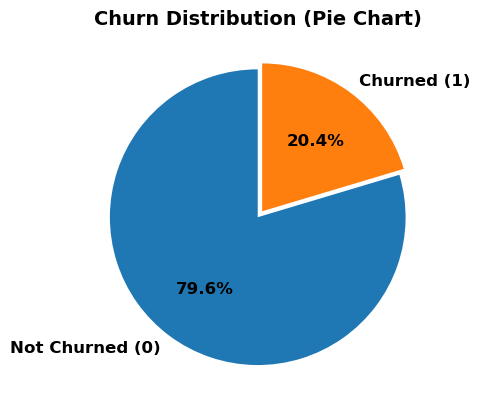

In [5]:
churn_counts = data['Exited'].value_counts()
labels = ['Not Churned (0)', 'Churned (1)']

plt.pie(churn_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=(0, 0.05),
        textprops={'fontsize': 12, 'weight': 'bold'})

plt.title("Churn Distribution (Pie Chart)", fontsize=14, weight='bold')

plt.show()

Churn is imbalanced, with significantly fewer customers exiting compared to those who stay.


Interpretation:


Churn appears to be higher among older customers, those with higher balances, customers from Germany, and those who are inactive or use fewer products—indicating weak engagement with the bank. In contrast, longer tenure, active membership, and multiple product subscriptions are strongly associated with lower churn, suggesting deeper customer loyalty.
Financial variables like credit score and estimated salary show minimal direct impact and become meaningful only when combined with behavioral factors. These relationships will be examined further through visual exploration before moving into modeling and identifying the most influential features.

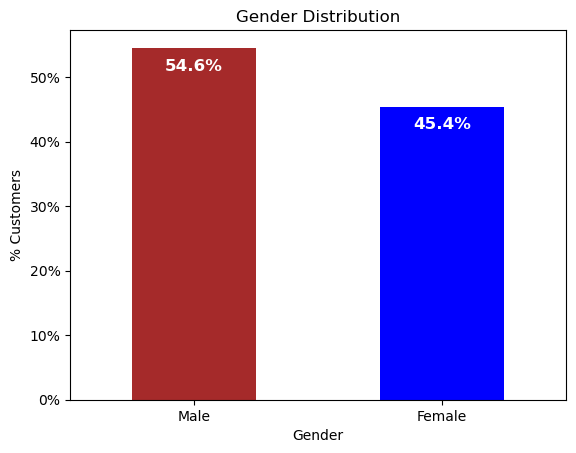

In [6]:
colors = ['brown', 'blue']
gender_counts = data['Gender'].value_counts()
ax = (gender_counts * 100.0 / len(data)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() - 3.5,
            f'{percentage:.1f}%',
            fontsize=12,
            color='white',
            weight='bold',
            ha='center'
           )

plt.show()

The gender distribution is nearly balanced, indicating that males and females are represented equally in the customer base.

 Age vs Churn

Age is an important demographic factor influencing a customer’s likelihood to churn. Analyzing how age varies between churned and non-churned customers helps identify whether certain age groups are more likely to leave the service.

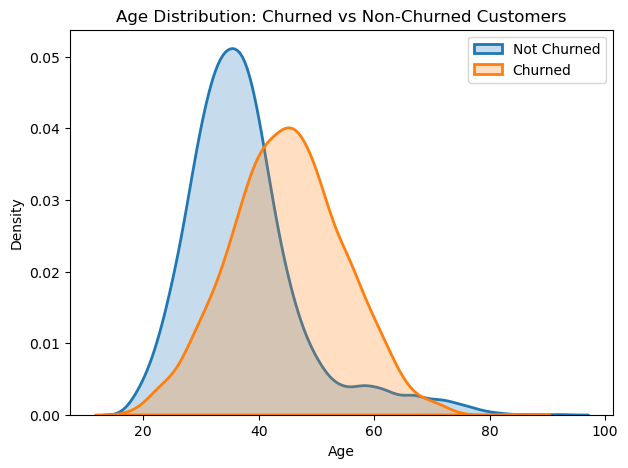

In [7]:
plt.figure(figsize=(7,5))

sns.kdeplot(data=data[data['Exited'] == 0], x='Age', shade=True, label='Not Churned', linewidth=2)
sns.kdeplot(data=data[data['Exited'] == 1], x='Age', shade=True, label='Churned', linewidth=2)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution: Churned vs Non-Churned Customers")
plt.legend()
plt.show()


The age distribution shows that churned customers are generally older, whereas non-churned customers are more concentrated in younger and middle-age ranges, indicating a higher churn tendency among older age groups.

Geography vs Churn
Geographic location often influences customer behavior due to regional market conditions, service quality differences, and demographic variations. Analyzing churn across different regions reveals whether certain locations have higher customer attrition.

<Figure size 700x500 with 0 Axes>

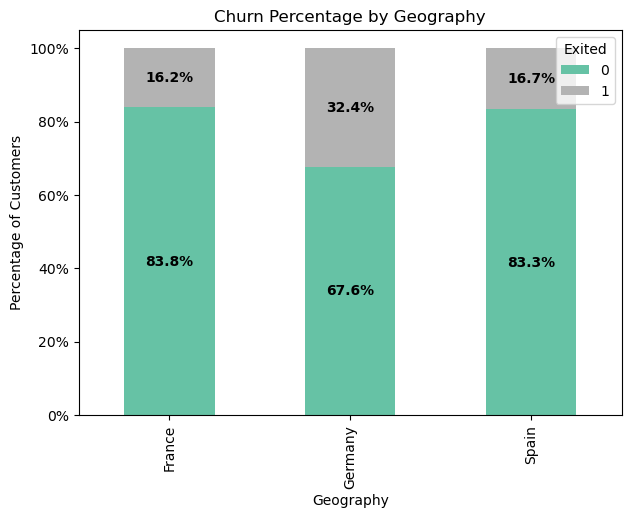

In [8]:
geo_churn = data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()*100

plt.figure(figsize=(7,5))
ax = geo_churn.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Set2')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel("Geography")
ax.set_ylabel("Percentage of Customers")
ax.set_title("Churn Percentage by Geography")
plt.legend(title="Exited")

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', 
                ha='center', va='center', fontsize=10, weight='bold')

plt.show()

Churn rates differ by geography, with certain regions showing significantly higher customer exit rates.

IsActiveMember vs Churn

Customer activity status often reflects how engaged they are with the service. Active members generally interact more with the platform, making them less likely to leave. Analyzing churn across active and inactive customers helps determine how engagement impacts retention.

<Figure size 700x500 with 0 Axes>

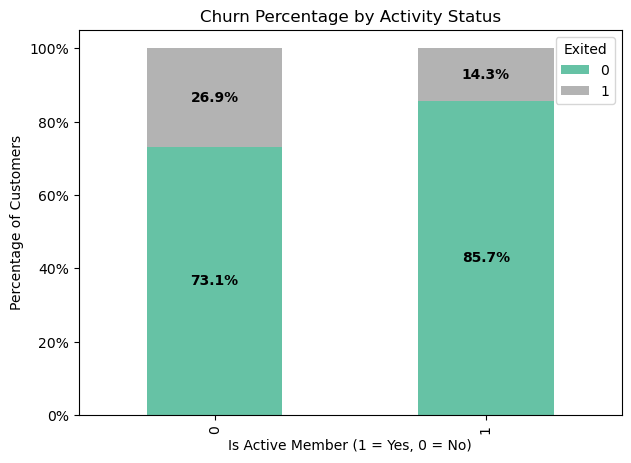

In [9]:
active_churn = data.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack()*100

plt.figure(figsize=(7,5))
ax = active_churn.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Set2')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel("Is Active Member (1 = Yes, 0 = No)")
ax.set_ylabel("Percentage of Customers")
ax.set_title("Churn Percentage by Activity Status")
plt.legend(title="Exited")

# Add percentage labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                ha='center', va='center', fontsize=10, weight='bold')

plt.show()

Inactive customers have a much higher churn rate than active customers, indicating that customer engagement plays a major role in retention.

CreditScore vs Churn

A KDE plot helps visualize how credit score distributions differ between churned and retained customers. It highlights whether churn is concentrated in specific credit score ranges and how the overall density shifts across customer groups.

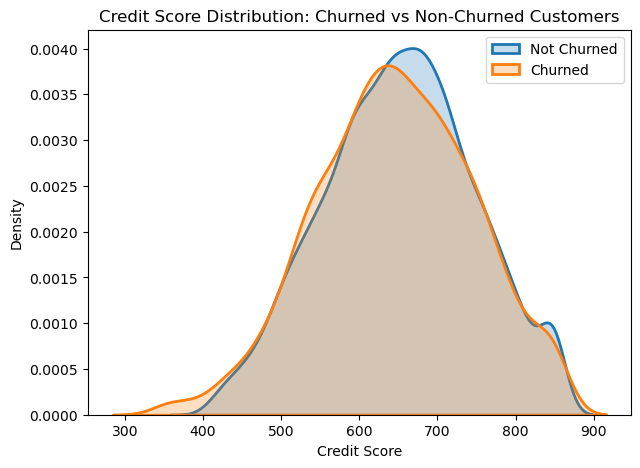

In [10]:
plt.figure(figsize=(7,5))

sns.kdeplot(data=data[data['Exited'] == 0], x='CreditScore', shade=True, label='Not Churned', linewidth=2)
sns.kdeplot(data=data[data['Exited'] == 1], x='CreditScore', shade=True, label='Churned', linewidth=2)

plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.title("Credit Score Distribution: Churned vs Non-Churned Customers")
plt.legend()

The KDE distribution shows that churned customers are slightly concentrated toward lower credit score ranges, while non-churned customers have a broader, more evenly distributed credit score profile, indicating a mild association between lower credit scores and higher churn likelihood.

EstimatedSalary vs Churn

Estimated salary represents a customer’s income level and may influence their spending behavior, financial stability, and overall engagement with services. Analyzing salary distribution across churned and retained customers helps determine whether income has any noticeable impact on churn patterns.

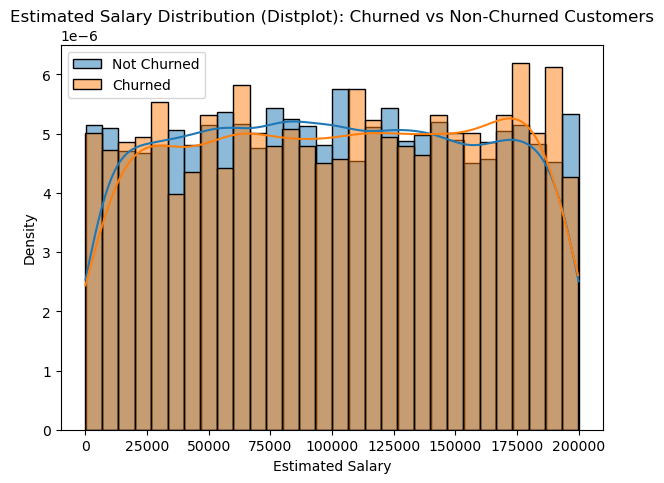

In [11]:
plt.figure(figsize=(7,5))

sns.histplot(data=data[data['Exited'] == 0], 
             x='EstimatedSalary', 
             kde=True,
             label='Not Churned', 
             stat='density',
             bins=30,
             alpha=0.5)

sns.histplot(data=data[data['Exited'] == 1], 
             x='EstimatedSalary', 
             kde=True,
             label='Churned', 
             stat='density',
             bins=30,
             alpha=0.5)

plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.title("Estimated Salary Distribution (Distplot): Churned vs Non-Churned Customers")
plt.legend()
plt.show()

The Estimated Salary distribution is nearly identical for churned and non-churned customers, indicating that income level does not significantly influence churn behavior.

Tenure vs Churn Boxplot

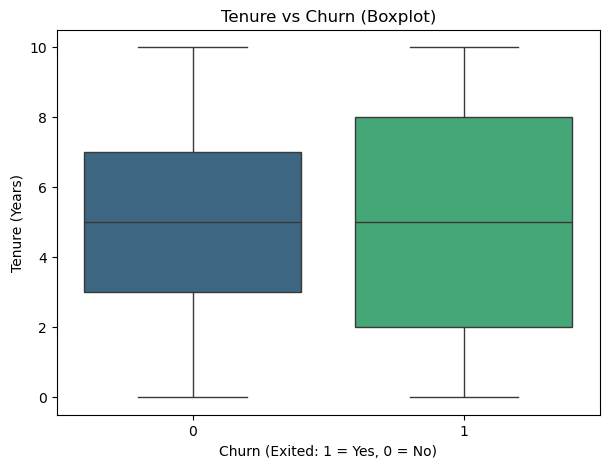

In [12]:
plt.figure(figsize=(7,5))

sns.boxplot(data=data, x='Exited', y='Tenure', palette='viridis')

plt.xlabel("Churn (Exited: 1 = Yes, 0 = No)")
plt.ylabel("Tenure (Years)")
plt.title("Tenure vs Churn (Boxplot)")

plt.show()


Customers with lower tenure are more likely to churn, while long-term customers show significantly lower churn rates.

Final Insights

Age, activity level, and geographic location emerged as the strongest churn-related features.

EstimatedSalary appears to have minimal influence on churn.

CreditScore shows minor differences but is not a dominant predictor.

Customer engagement (IsActiveMember) is one of the most actionable insights for reducing churn.

The dataset is imbalanced, and careful consideration is required when developing predictive models.

Predictive modeling - ML Algorithms

1. Logistic Regresson

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score, roc_curve, auc

In [14]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

In [15]:
le_geo = LabelEncoder()
le_gender = LabelEncoder()

X['Geography'] = le_geo.fit_transform(X['Geography'])
X['Gender'] = le_gender.fit_transform(X['Gender'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [19]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7816666666666666


Axes(0.125,0.11;0.775x0.77)


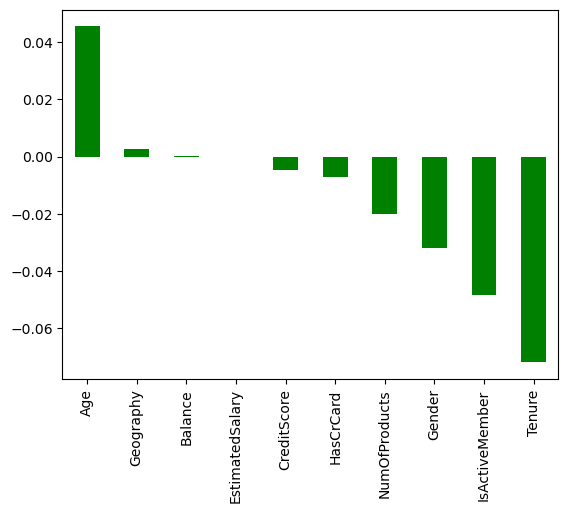

In [20]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


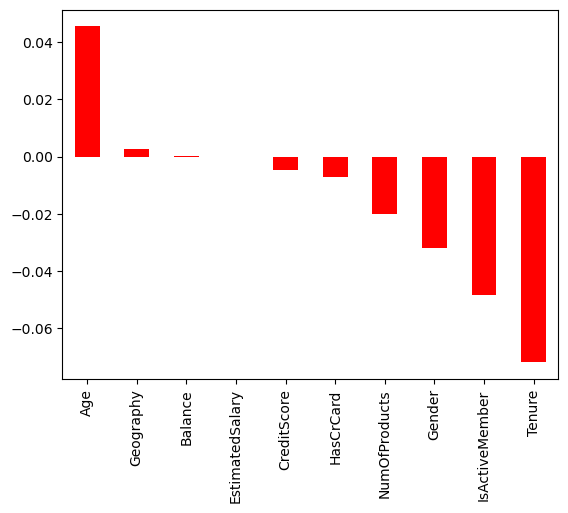

In [21]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))

Observations – Logistic Regression

Age increases churn risk, making it the strongest positive predictor.
Tenure reduces churn, showing long-term customers are more loyal.
Active members and customers with more products are less likely to churn.
CreditScore, Balance, and EstimatedSalary have weak influence on churn.
Overall, LR provides clear, interpretable insights, but may miss nonlinear patterns.

2. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [24]:
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.859


<Axes: >

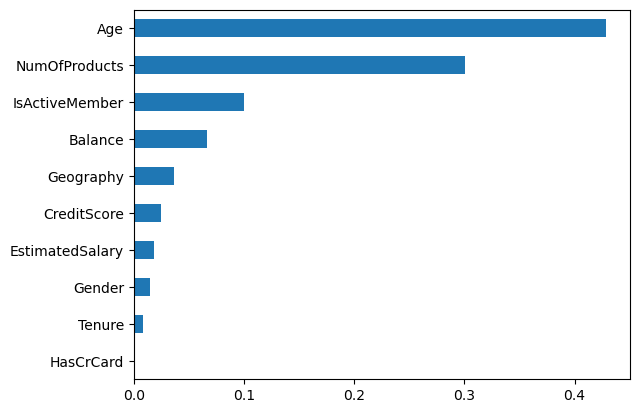

In [25]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

3. DecisionTree 

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
data = DecisionTreeClassifier()

In [30]:
data.fit(X_train, y_train)
y_pred = data.predict(X_test)

In [31]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


<Axes: >

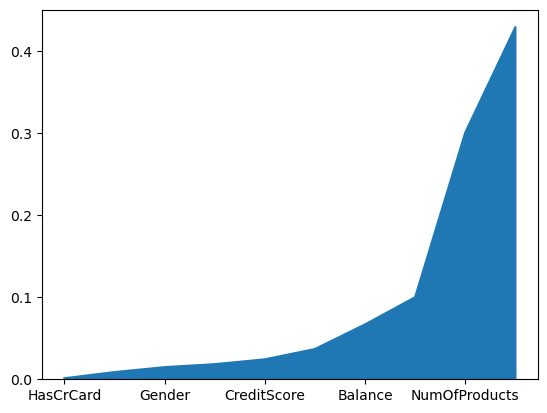

In [32]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'area')

The Decision Tree model shows that Age, Tenure, and key customer behavior features are the strongest drivers of churn.

4. Support Vecor Machine (SVM)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [33]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7755

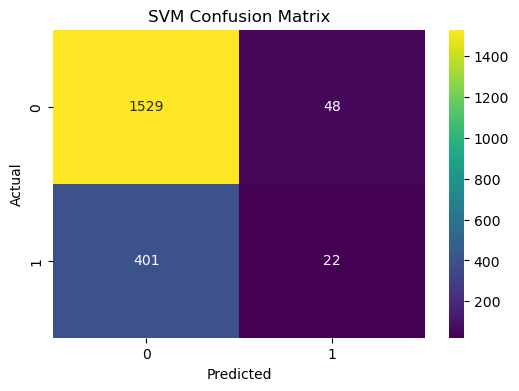

In [37]:
preds = model.svm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

The SVM confusion matrix reveals how accurately the model distinguishes between churned and non-churned customers.

SVM performs well by identifying complex boundaries between churned and non-churned customers, with Age and Tenure emerging as the most influential factors in distinguishing the two groups but it requires high computing power.

5. ADA Boost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8525

5. XG Boost

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8625